In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
adv = pd.read_csv("E:\Edrive\Sudhanshu\Datatrained Projects/Advertising.csv")

In [3]:
adv.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
Unnamed: 0    200 non-null int64
TV            200 non-null float64
radio         200 non-null float64
newspaper     200 non-null float64
sales         200 non-null float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [5]:
adv.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

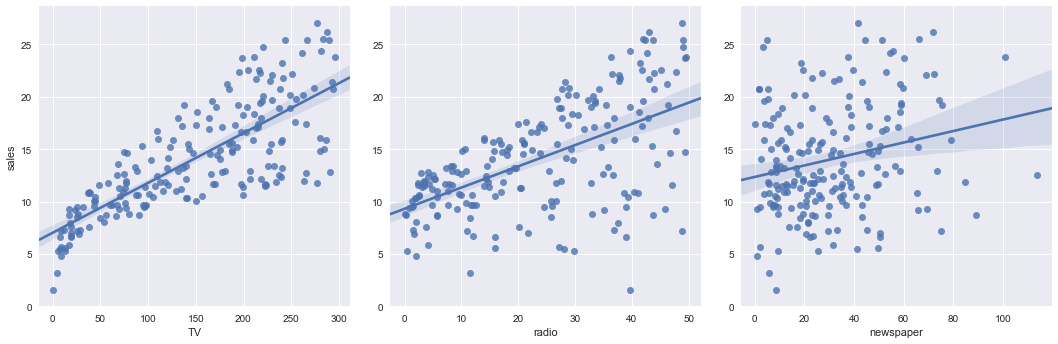

In [18]:
sns.pairplot(adv, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=5, kind='reg')

# There is no linearity bewtween newspaper and sales, we can drop newspaper

In [39]:
X = adv[['TV','radio','newspaper']]
y = adv['sales']

In [40]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(134, 3)
(66, 3)
(134,)
(66,)


In [42]:
# import model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [43]:
print(lr.intercept_)
print(lr.coef_)

3.01919516169
[ 0.04574124  0.180924    0.0031418 ]


In [46]:
prediction=lr.predict(X_test)
lr.score(X_test,y_test)

0.9142453857006444

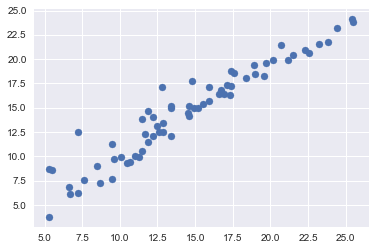

In [47]:
plt.scatter(y_test,prediction)

In [51]:
from sklearn import metrics
print('MAE', metrics.mean_absolute_error(y_test,prediction))
print('MSE', metrics.mean_squared_error(y_test,prediction))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,prediction)))

MAE 1.11632430778
MSE 2.30460308994
RMSE 1.51809192407


# Prediction without variable 'Newspaper'

In [53]:
X2 = adv[['TV','radio']]

In [56]:
from sklearn.cross_validation import train_test_split
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.33, random_state=1)

In [59]:
lr2 = LinearRegression()
lr2.fit(X2_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [60]:
print(lr2.intercept_)
print(lr2.coef_)

3.06663328167
[ 0.0457949   0.18263817]


In [63]:
prediction2=lr2.predict(X2_test)
lr2.score(X2_test,y_test)

0.91531932330157295

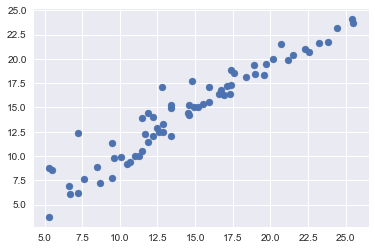

In [65]:
plt.scatter(y_test,prediction2)

In [66]:
print('MAE', metrics.mean_absolute_error(y_test,prediction2))
print('MSE', metrics.mean_squared_error(y_test,prediction2))
print('RMSE', np.sqrt(metrics.mean_squared_error(y_test,prediction2)))

MAE 1.10754780836
MSE 2.27574167025
RMSE 1.50855615416


# The error metrices decreased by removing newpaper